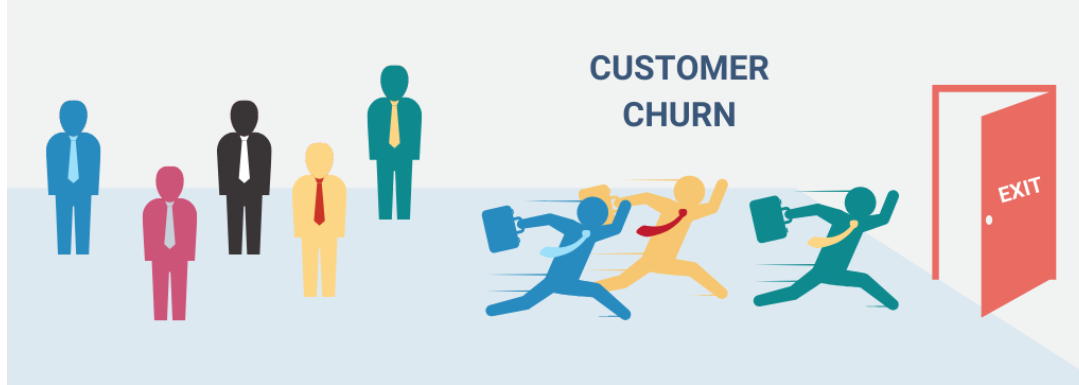

# **Data Description**

* customerID: A unique identifier for each customer.

* gender: The gender of the customer (Male/Female).

* SeniorCitizen: Indicates whether the customer is a senior citizen (1: Yes, 0: No).

* Partner: Indicates whether the customer has a partner (Yes/No).

* Dependents: Indicates whether the customer has dependents (Yes/No).

* tenure: The number of months the customer has been with the company.

* PhoneService: Indicates whether the customer has phone service (Yes/No).

* MultipleLines: Indicates whether the customer has multiple lines (Yes/No).

* InternetService: The type of internet service the customer has (DSL/Fiber optic/No).

* OnlineSecurity: Indicates whether the customer has online security (Yes/No).

* OnlineBackup: Indicates whether the customer has online backup service (Yes/No).

* DeviceProtection: Indicates whether the customer has device protection (Yes/No).

* TechSupport: Indicates whether the customer has tech support service (Yes/No).

* StreamingTV: Indicates whether the customer has streaming TV service (Yes/No).

* StreamingMovies: Indicates whether the customer has streaming movies service (Yes/No).

* Contract: The type of contract the customer has (Month-to-month/One year/Two year).

* PaperlessBilling: Indicates whether the customer has paperless billing (Yes/No).

* PaymentMethod: The method the customer uses to pay (Electronic check/Mailed check/Bank transfer/credit card).

* MonthlyCharges: The amount charged to the customer each month.

* TotalCharges: The total amount charged to the customer during their tenure.

* Churn: Indicates whether the customer has churned (1: Yes, 0: No).

# **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score,roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import warnings
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

# **Importing the Data**

In [2]:
df=pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Exploration**

## **Understand the Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

* **Total Charges** feature contains numerical values but is currently stored as a string datatype.

## **Check Missing Values**

In [9]:
#Check for Missing and Blank Values
print(" Null Values Count per Column:")
print(df.isnull().sum())
print("="*40)

print(" Blank String Count per Column:")
print((df == " ").sum())
print("="*40)

 Null Values Count per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
 Blank String Count per Column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Ch

## **Check Duplicates**

In [10]:
print("Number of Duplicates:",df.duplicated().sum())

Number of Duplicates: 0


## **Check Outliers**

In [11]:
# Boxplot for numeric columns
"""num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col],color='#3c6e71')
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show()"""

"num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']\nfor col in num_cols:\n    plt.figure(figsize=(6, 4))\n    sns.boxplot(x=df[col],color='#3c6e71')\n    plt.xlabel(col)\n    plt.title(f'Boxplot of {col}')\n    plt.show()"

In [12]:
# Value Counts for All Columns
for column in df.columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts(dropna=False))  # Shows NaNs if any
    print("="*60)

Value Counts for 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Value Counts for 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
Value Counts for 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Value Counts for 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Value Counts for 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Value Counts for 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
Value Counts for 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Value Counts for 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No p

In [13]:
#Unique Values for All columns
for column in df.columns:
    print(f"Unique Values in '{column}':")
    print(df[column].unique())
    print("="*60)

Unique Values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Values in 'gender':
['Female' 'Male']
Unique Values in 'SeniorCitizen':
[0 1]
Unique Values in 'Partner':
['Yes' 'No']
Unique Values in 'Dependents':
['No' 'Yes']
Unique Values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique Values in 'PhoneService':
['No' 'Yes']
Unique Values in 'MultipleLines':
['No phone service' 'No' 'Yes']
Unique Values in 'InternetService':
['DSL' 'Fiber optic' 'No']
Unique Values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']
Unique Values in 'OnlineBackup':
['Yes' 'No' 'No internet service']
Unique Values in 'DeviceProtection':
['No' 'Yes' 'No internet service']
Unique Values in 'TechSupport':
['No' 'Yes' 'No internet service']
Unique Valu

* **CustomerID**:This column is not a categroical column , unique identifier and does not provide any insight for analysis .

* **Binary columns** [gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn]

## **Data Distributions & Summary**

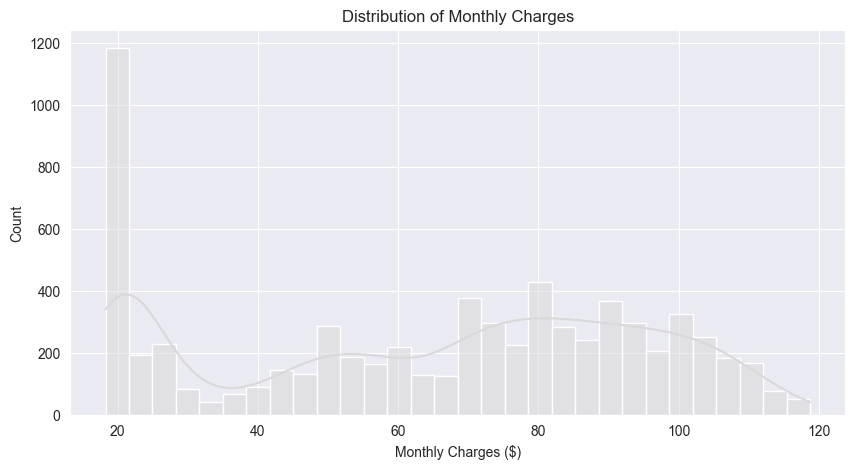

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='#d9d9d9')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

### Insights from Monthly Charges Distribution:
 - If churn is higher among low-paying customers (<$30), they might not find enough value in the service.
   → Solution: Improve service offerings or provide better retention offers.
  
 - If churn is higher in the mid-range ($30-$70), customers may be exploring competitors.
   → Solution: Analyze competitors and introduce competitive pricing or features.
   
 - If churn is higher in the high-paying segment (>$70), customers may feel the service is too expensive.
   → Solution: Offer premium benefits, loyalty programs, or personalized discounts.

In [15]:
bins=[0,30,70,df['MonthlyCharges'].max()]
labels=['Low','Mid','High']
df['MonthlyCharges_Category']=pd.cut(df['MonthlyCharges'],bins=bins,labels=labels)
churn_rate=df.groupby('MonthlyCharges_Category')['Churn'].value_counts(normalize=True).unstack()
churn_rate

Churn,No,Yes
MonthlyCharges_Category,,
Low,0.901996,0.098004
Mid,0.756502,0.243498
High,0.646386,0.353614


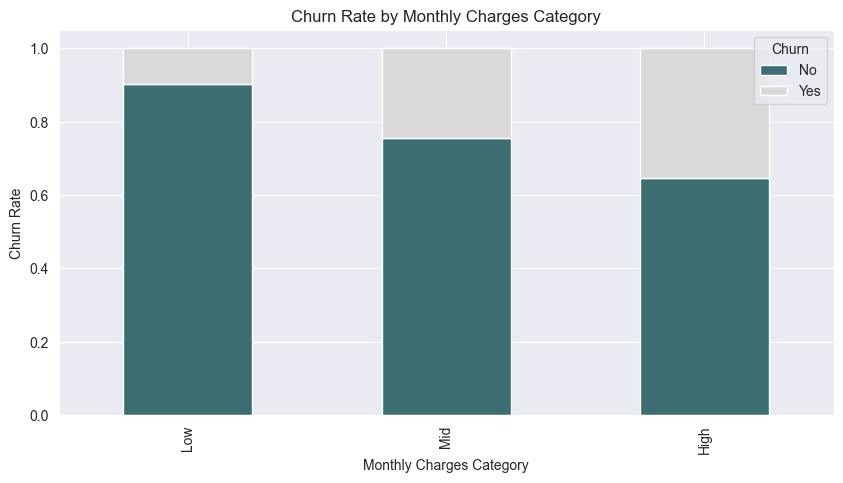

In [16]:
churn_rate.plot(kind='bar',stacked=True,figsize=(10,5),color=['#3c6e71','#d9d9d9'])
plt.title("Churn Rate by Monthly Charges Category")
plt.xlabel("Monthly Charges Category")
plt.ylabel("Churn Rate")
plt.legend(title="Churn")
plt.show()

### Insights from Churn Rate by Monthly Charges Category:
 - High-paying customers show the highest churn rate, suggesting they may find the service too expensive or not worth the cost.

#### Recommendations:
 - For high-paying customers, introduce loyalty programs, discounts, or premium benefits to retain them.

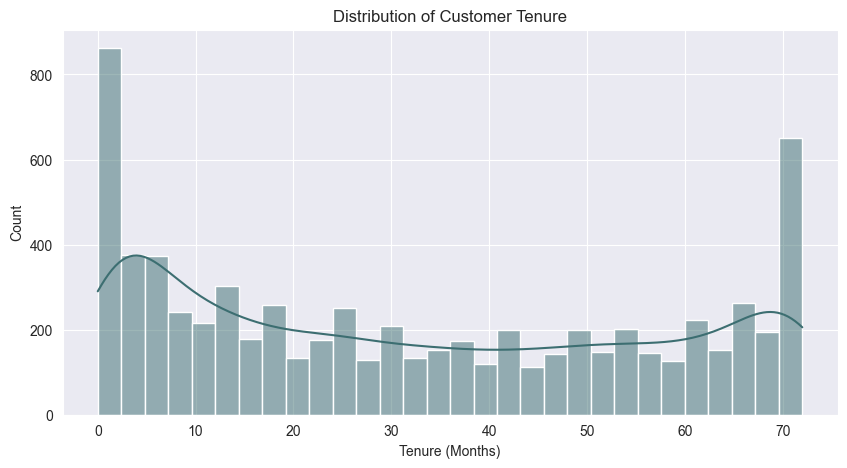

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color='#3c6e71')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

###   Insights from Customer Tenure Distribution:
 - A significant number of customers leave within the first few months, indicating early churn issues.


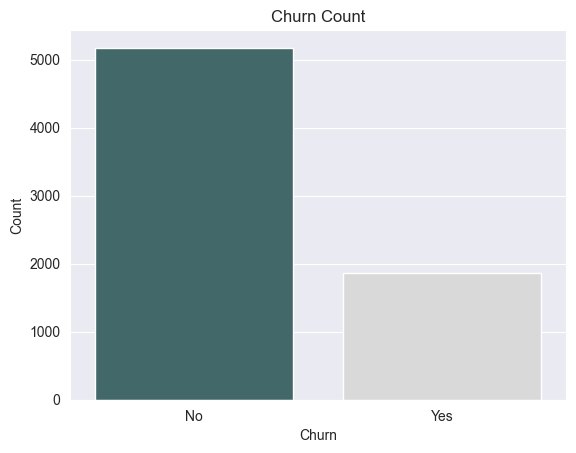

In [18]:
# Churn count
sns.countplot(x='Churn', data=df, palette=['#3c6e71', '#d9d9d9'])
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

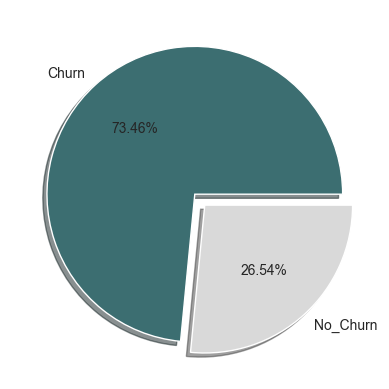

In [19]:
plt.pie(x=df["Churn"].value_counts().values,labels=['Churn','No_Churn'],autopct='%.02f%%',explode=[0, 0.1],
    shadow=True,colors=['#3c6e71','#d9d9d9'])
plt.show()

* Approximately 27% of users have left the company.
* We will try to discover why these customers left the company.

###  **Analyze Categorical Features**

In [20]:
categorical_cols = ['InternetService', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod','PaperlessBilling',]


for col in categorical_cols:
    counts = df[col].value_counts(normalize=True) * 100
    counts = counts.round(2).astype(str) + "%"

    print(f"\n{col} Distribution:\n{counts}\n")

    # Generate a dynamic insight based on the highest category
    most_common = counts.idxmax()
    print(f"=============== Most customers prefer '{most_common}' {col} ===============\n")



InternetService Distribution:
InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'Fiber optic' InternetService ===============


OnlineBackup Distribution:
OnlineBackup
No                     43.84%
Yes                    34.49%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' OnlineBackup ===============


DeviceProtection Distribution:
DeviceProtection
No                     43.94%
Yes                    34.39%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' DeviceProtection ===============


TechSupport Distribution:
TechSupport
No                     49.31%
Yes                    29.02%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' TechSupport ===============


StreamingTV Distribution:
StreamingTV
No        

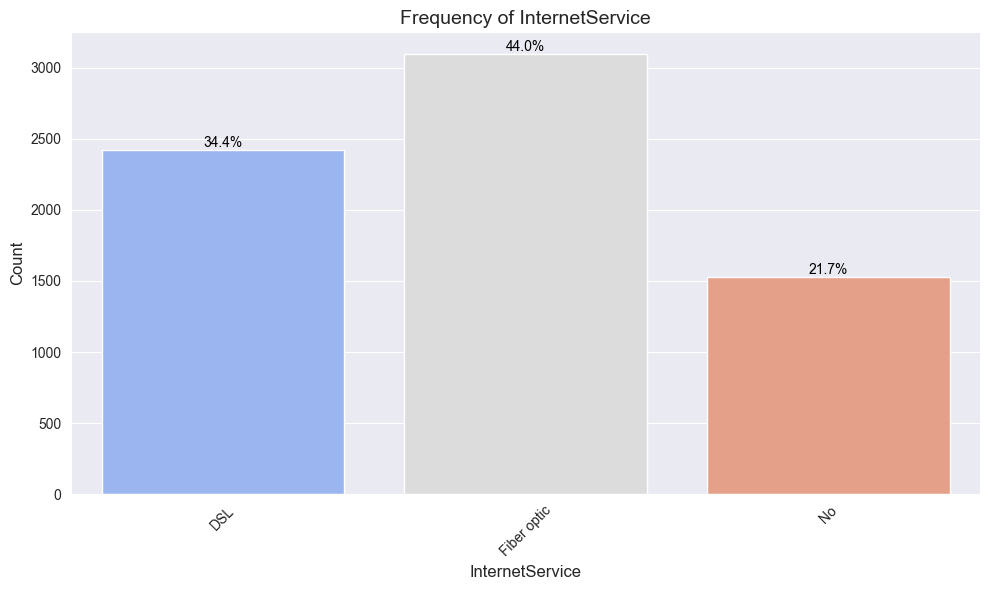

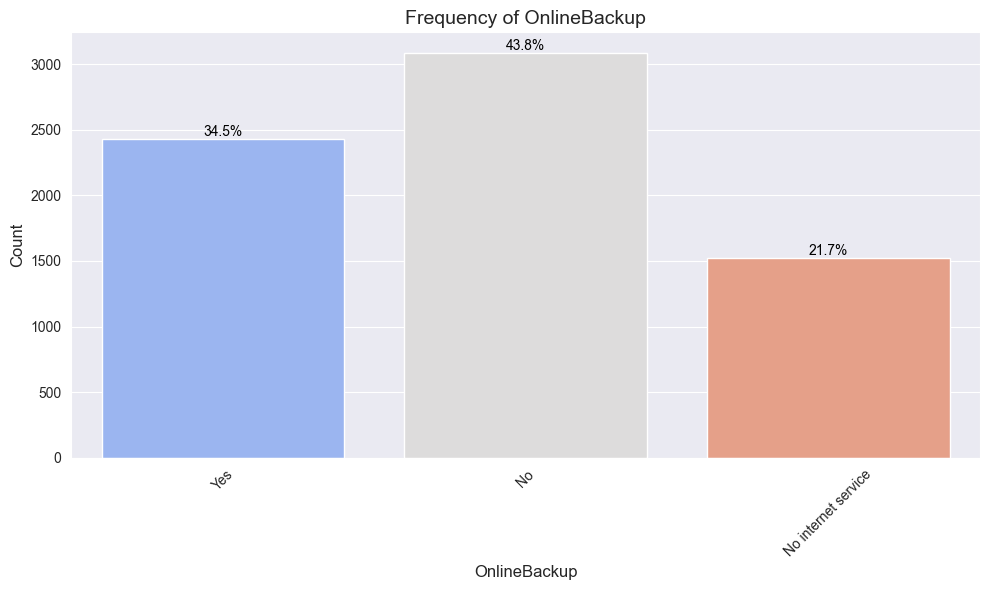

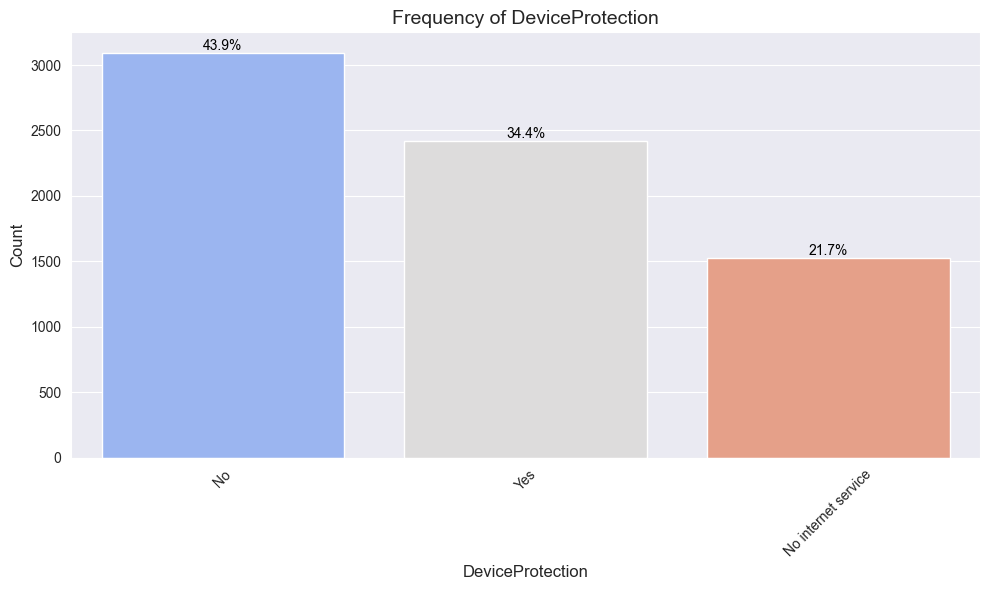

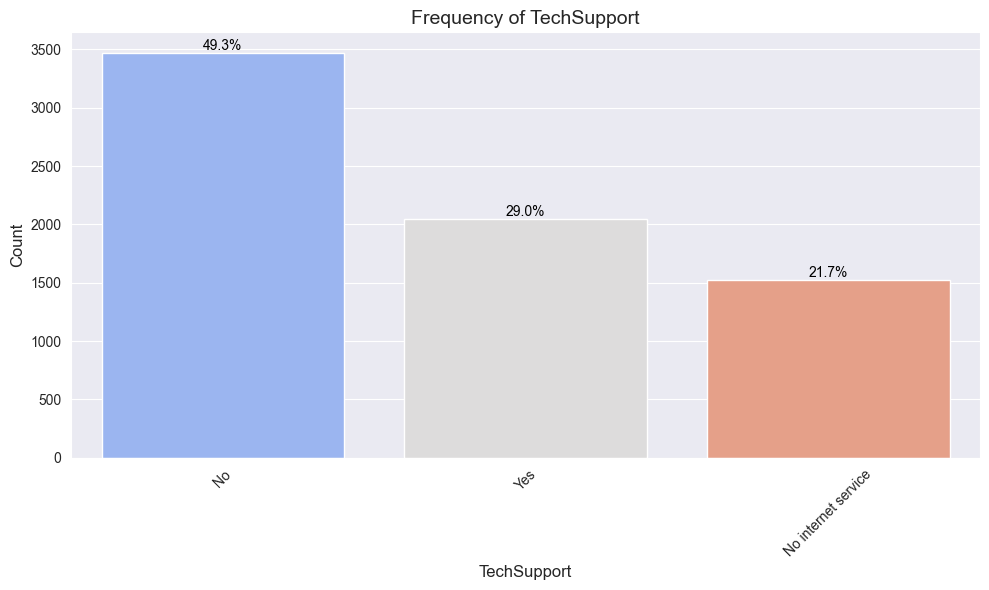

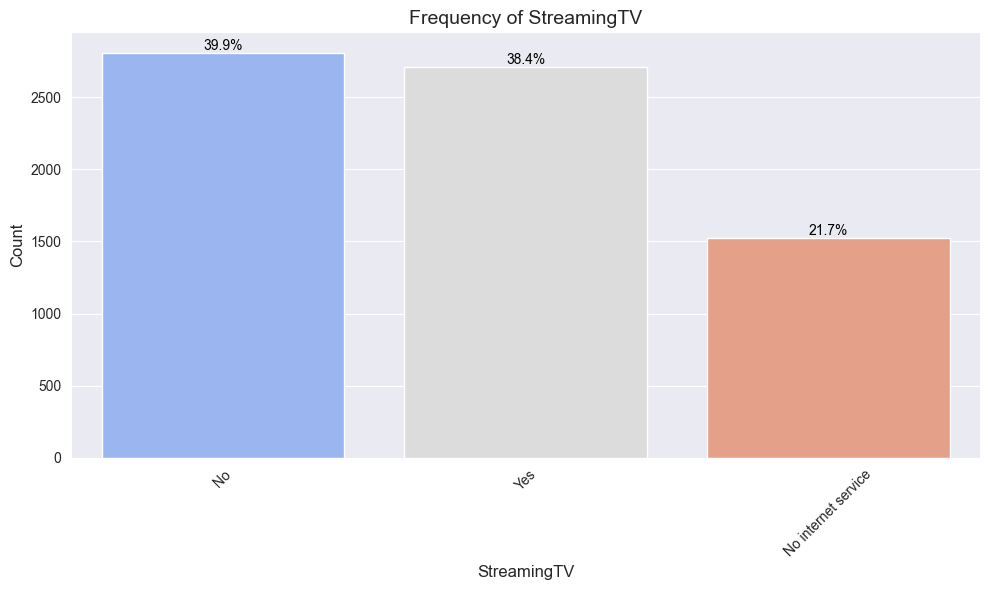

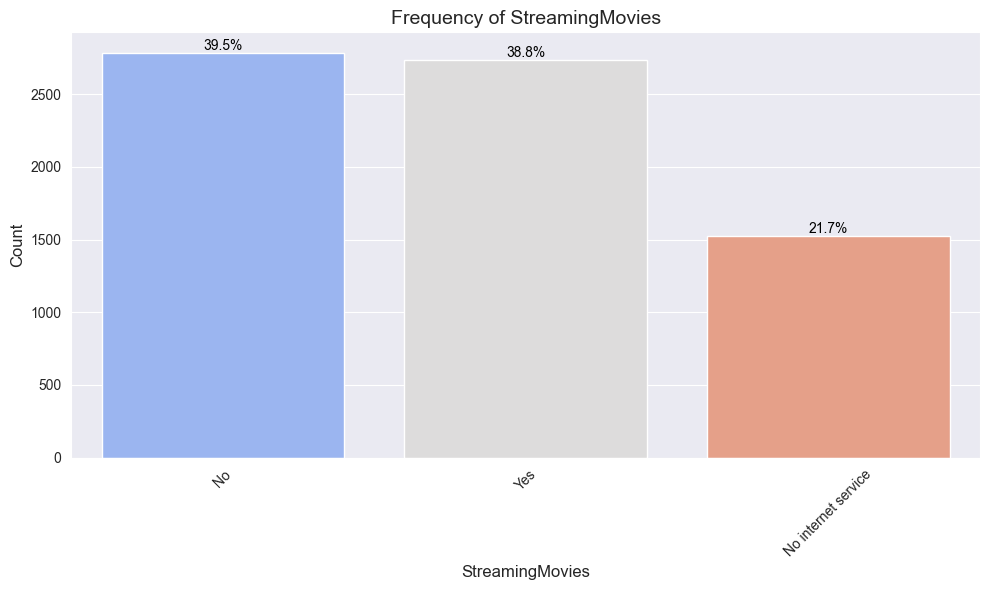

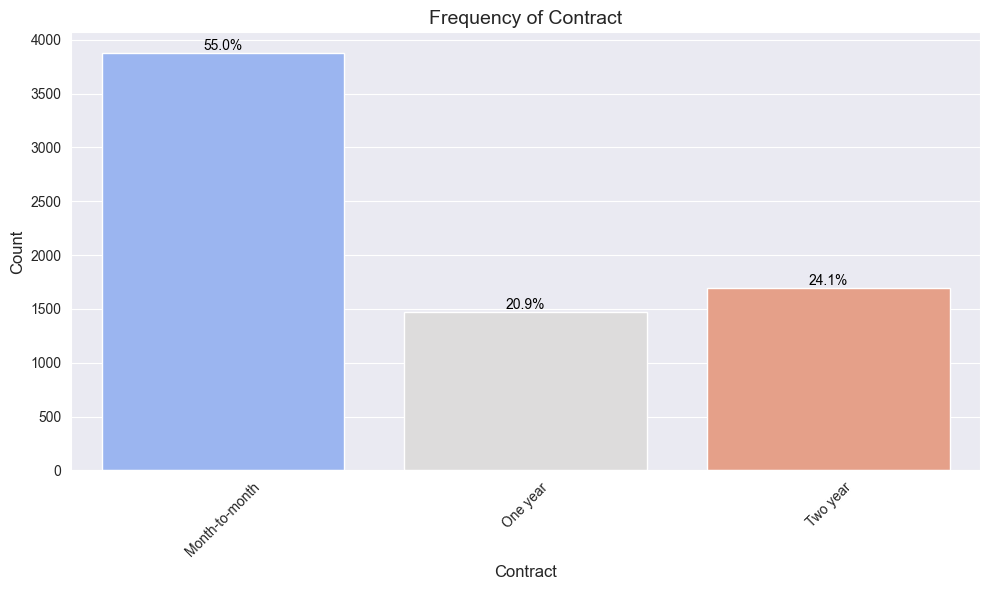

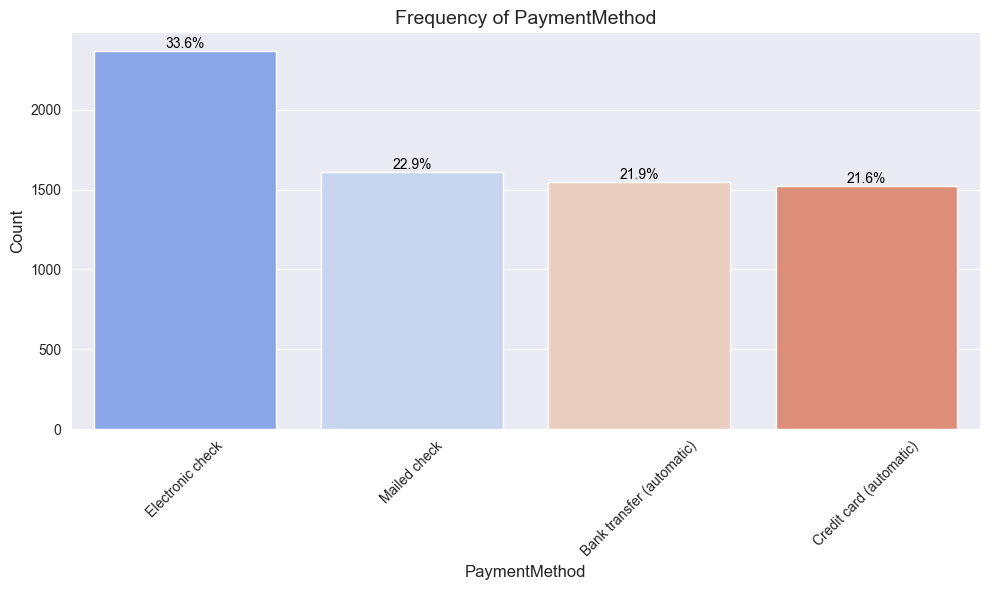

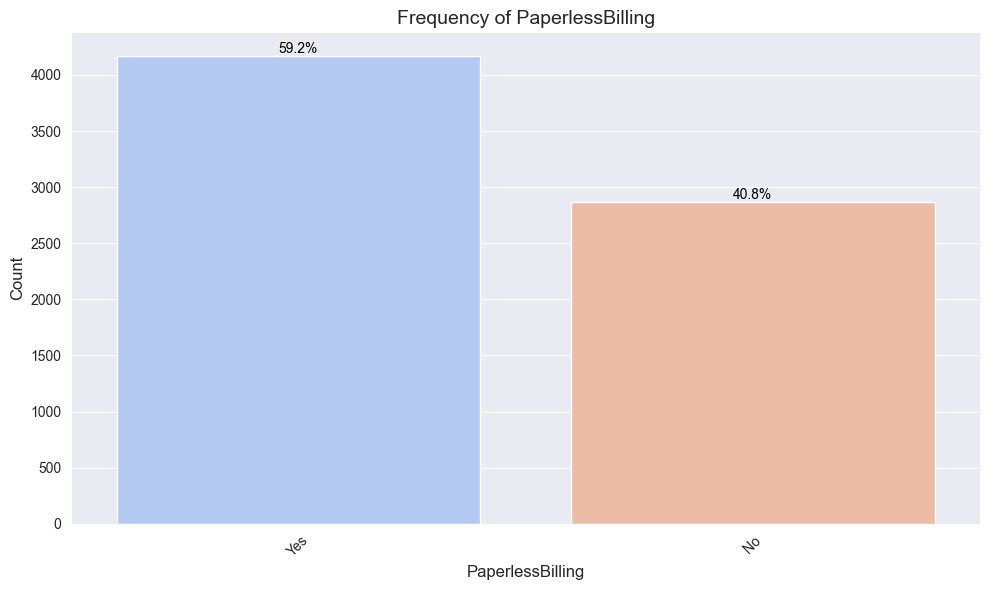

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f'Frequency of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

    # Annotate with percentage
    total = len(df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# **Preprocessing and Feature Engineering:**

In [22]:
#Fix TotalCharges
df['TotalCharges']=df.apply(lambda x: x['MonthlyCharges'] if x['TotalCharges'] == ' ' else x['TotalCharges'], axis=1)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].isnull().sum())

0


In [23]:
#Drop irrelevant columns
df.drop(['customerID'],axis=1,inplace=True)

In [24]:
df['TotalCharges'].dtype

dtype('float64')

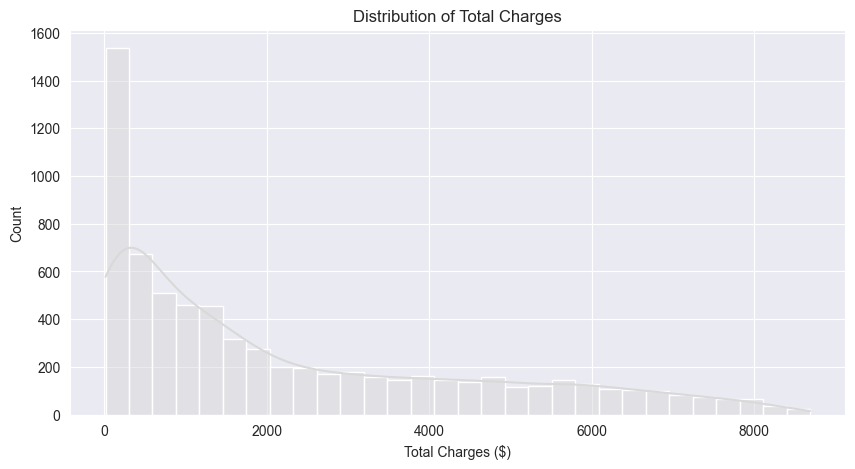

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='#d9d9d9')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Count")
plt.show()

In [26]:
categorical_cols=df.select_dtypes(include='object').columns
print("Categorical Columns: \n",categorical_cols)
print("="*60)
numerical_cols=df.select_dtypes(exclude='object').columns
print("Numerical Columns:\n ",numerical_cols)

Categorical Columns: 
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Columns:
  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MonthlyCharges_Category'],
      dtype='object')


### **Compare Customer services with Churn**

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

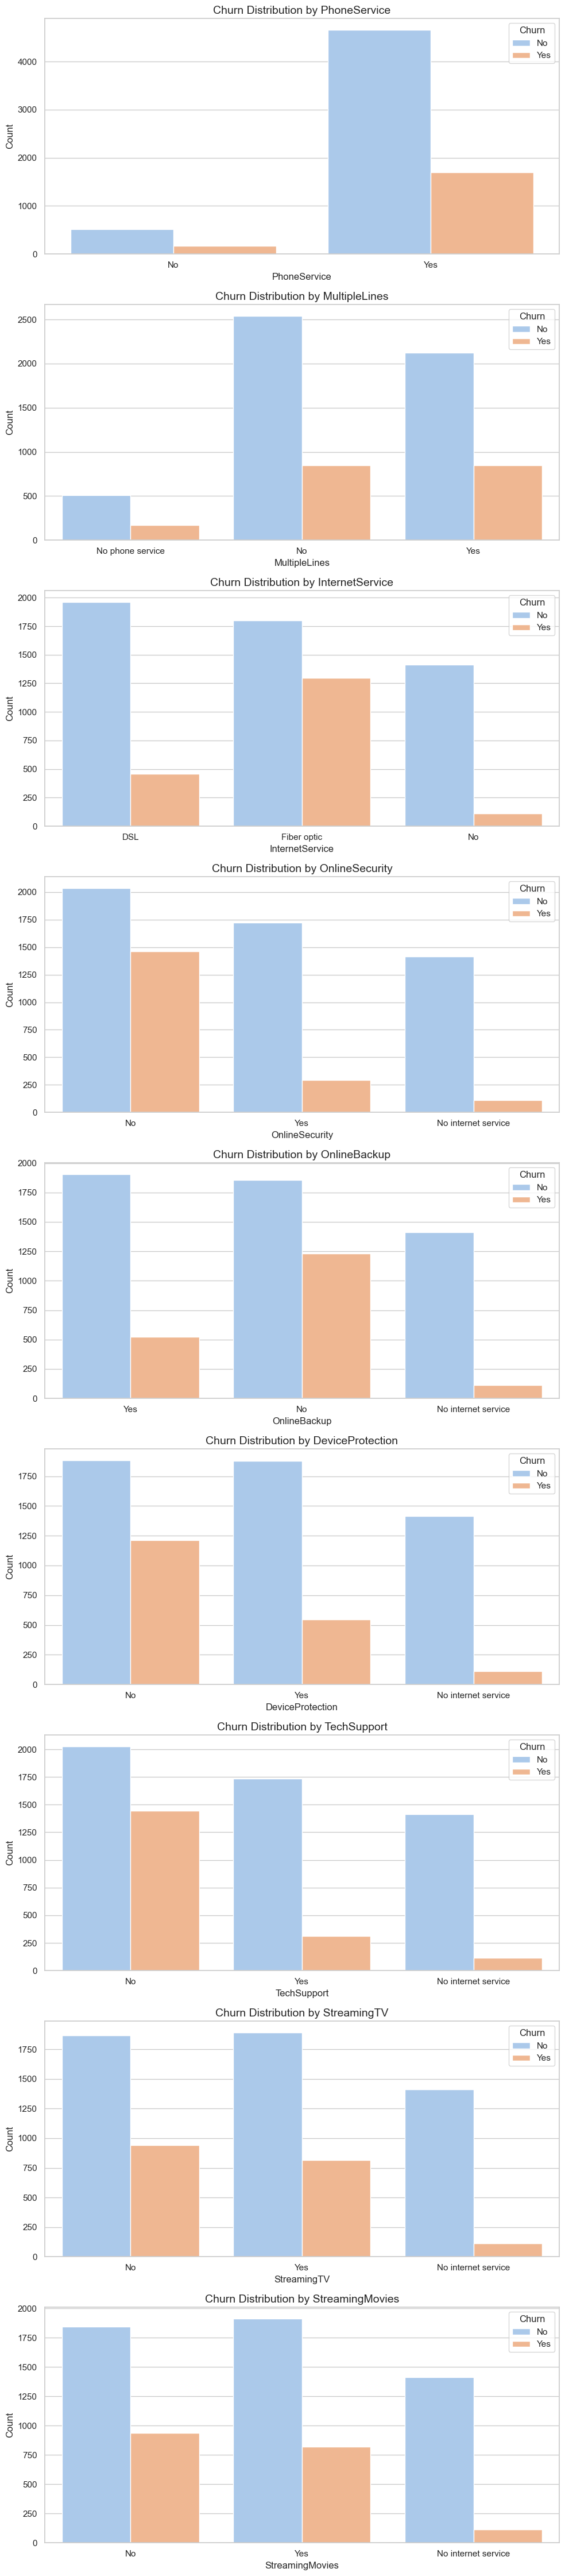

In [27]:
# List of service columns
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(services), ncols=1, figsize=(10, 5 * len(services)))

for i, service in enumerate(services):
    ax = axes[i]

    # Plot countplot with Churn hue
    sns.countplot(x=service, hue='Churn', data=df, palette='pastel', ax=ax)
    ax.set_title(f'Churn Distribution by {service}', fontsize=14)
    ax.set_xlabel(service, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### **Compare Customer Account Info with Churn**

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

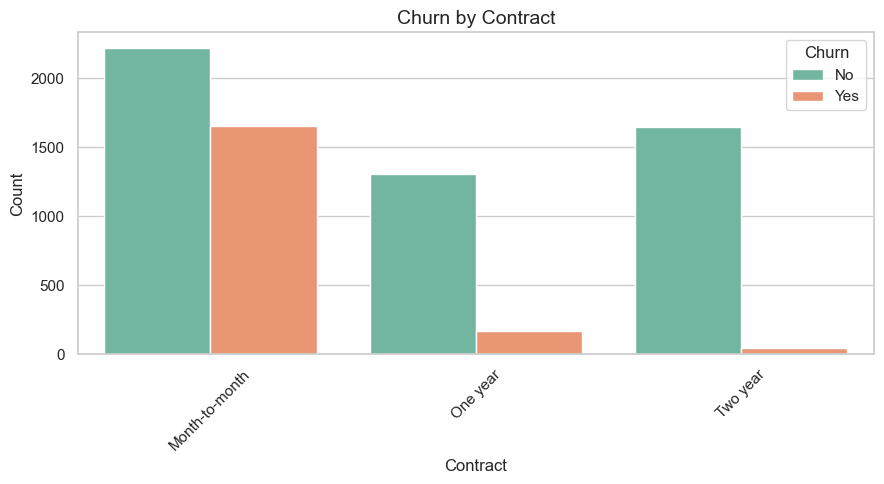

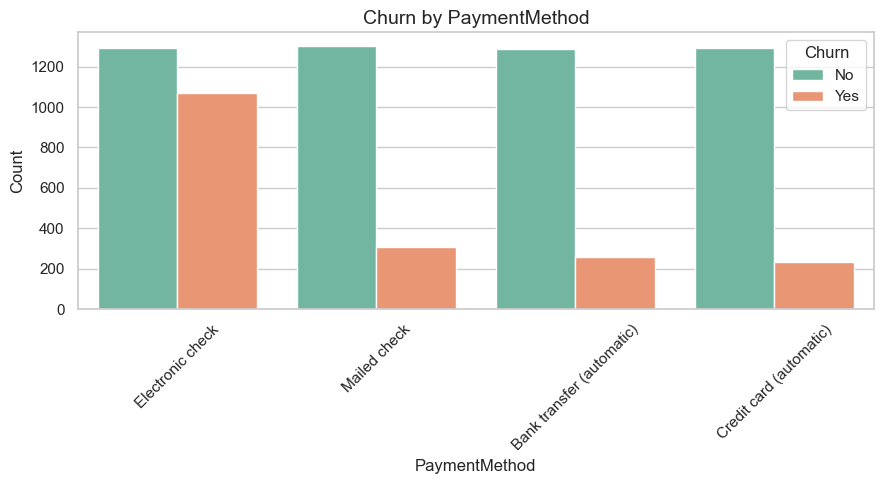

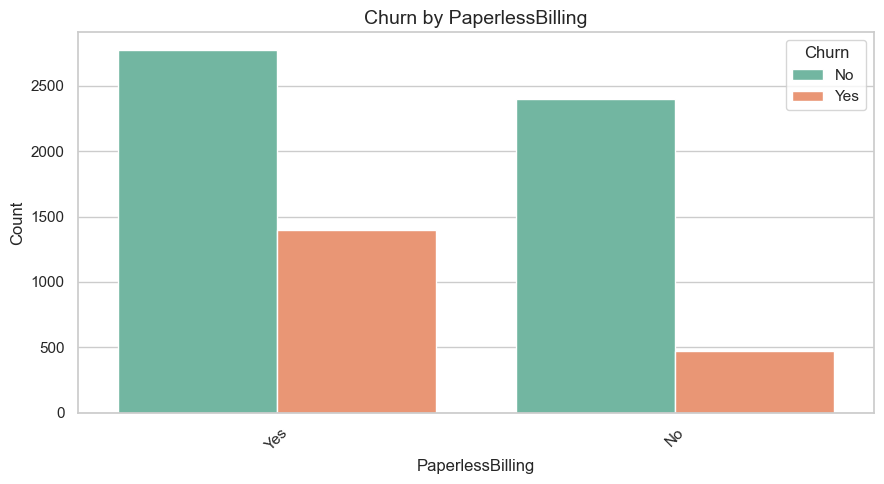

In [28]:
# Categorical features
cat_features = ['Contract', 'PaymentMethod', 'PaperlessBilling']
# Plot categorical features vs Churn
for col in cat_features:
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 

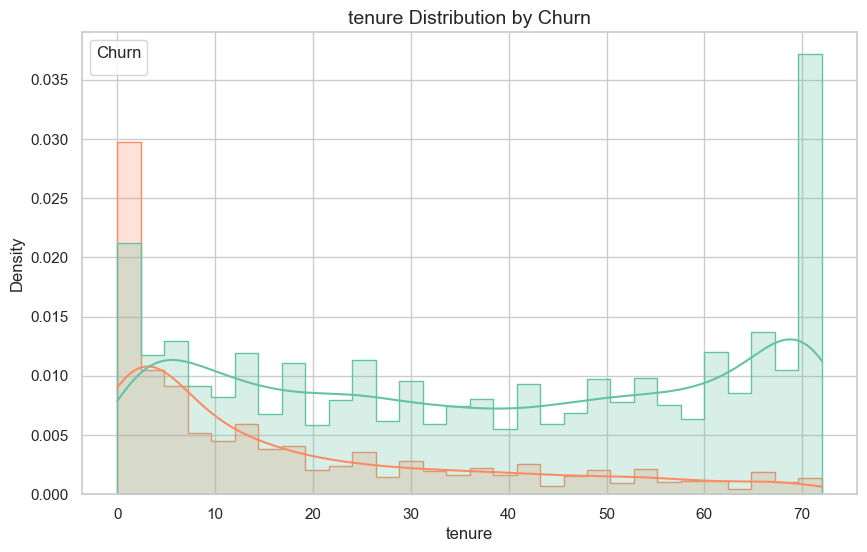

In [29]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='Set2', element='step', stat='density')
    plt.title(f'{col} Distribution by Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

### Compare Demographic Features vs Churn

In [ ]:
# Demographic columns to compare
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Plot each demographic feature vs churn
for col in demographic_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    plt.title(f'Churn by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

In [ ]:
# Columns where  want to replace service-specific 'No' values
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'MultipleLines']

# Replace 'No internet service' and 'No phone service' with 'No'
df[replace_cols] = df[replace_cols].replace({'No internet service': 'No',
                                              'No phone service': 'No'})

In [ ]:
for col in replace_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

### Feature Engineering

In [ ]:
df['TotalPaid'] = df['MonthlyCharges'] * df['tenure']

In [ ]:
# Create streaming services flag
df['has_streaming'] = ((df['StreamingTV'] == 'Yes') |
                          (df['StreamingMovies'] == 'Yes')).astype(int)

In [ ]:
# Create security services flag
df['has_protection'] = ((df['OnlineSecurity'] == 'Yes') |
                           (df['OnlineBackup'] == 'Yes') |
                           (df['DeviceProtection'] == 'Yes') |
                           (df['TechSupport'] == 'Yes')).astype(int)

In [ ]:
df.head()

### **Label encoding of categorical fetaures**

In [ ]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [ ]:
df['MonthlyCharges_Category']=df['MonthlyCharges_Category'].replace({'Low':0,'Mid':1,'High':2})

In [ ]:
df.head()

### **Scaling Data**

In [ ]:
#numeric features to scale
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges','TotalPaid']

scaler = MinMaxScaler()

# Fit and transform numeric columns
df_scaled = df.copy()
df_scaled[scaling_columns] = scaler.fit_transform(df_scaled[scaling_columns])

In [ ]:
df_scaled.head()

# **Exploratory Data Analysis (EDA)**

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# Get the relation between MonthlyCharges and TotalCharges
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
lm_plot = sns.lmplot(data=df_scaled, x='MonthlyCharges', y='TotalCharges', fit_reg=True,line_kws={'color': 'green'})


plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.title('Relationship Between Monthly Charges and Total Charges')

# Show the plot
plt.show()

In [ ]:
sns.pairplot(df_scaled, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='Set2')
plt.suptitle("Pair Plot of Numeric Features by Churn", y=1.02, fontsize=16)
plt.show()

# **Advanced Data Analysis**

## **Explore feature relationships using Chi2 (for categorical features)**


In [ ]:
df=df_scaled.copy()

In [ ]:
# Drop the target column
X = df.drop('Churn', axis=1)
y = df['Churn']

# Chi2 requires non-negative values, so filter numeric columns accordingly
X_chi2 = X.copy()
X_chi2 = X_chi2[X_chi2.columns[(X_chi2 >= 0).all()]]

# Apply Chi-Square test to select top 10 features
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_kbest = chi2_selector.fit_transform(X_chi2, y)

# Get the names of selected features
selected_features = X_chi2.columns[chi2_selector.get_support()]
print("Top Features by Chi-Square Test:\n", selected_features)


##**Remove Highly Correlated Features**

In [ ]:
corr_matrix = df.drop('Churn', axis=1).corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:\n", to_drop)

df.drop(to_drop, axis=1, inplace=True)


In [ ]:
print("Final Shape:", df.shape)
df.head()

##**Explore feature relationships using Correlation Matrix (for numerical features only)**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df_corr = df[numeric_cols].copy()
df_corr['Churn'] = y

plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Churn")
plt.show()


##**Univariate Feature Selection by ANOVA F-test (SelectKBest) for numerical features**

In [ ]:
X_numerical = df[numeric_cols]
y = df['Churn']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_numerical, y)

anova_scores = pd.DataFrame({
    'Feature': X_numerical.columns,
    'F-Score': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

print(anova_scores)
#Best feature that has high F-Score and P-Value <0.05

##**Feature extraction using Recursive Feature Elimination (RFE)**

* for numeric and categorical features

## **select best feature based on ML model**

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe_fit = rfe.fit(X, y)

rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe_fit.support_,
    'Ranking': rfe_fit.ranking_
})

print(rfe_results[rfe_results['Selected'] == True])
#Best features that has ranking=1

##**Feature selection using Mutual Information**

* **for numeric and categorical features**

In [ ]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

mi = mutual_info_classif(X, y)

mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi})
mi_results = mi_results.sort_values(by='MI Score', ascending=False)

print(mi_results)
#Best features with high MI Score

-**These features have no impact on the model as their importance is 0.000000, so they can be safely removed:**
- gender
- DeviceProtection
- StreamingMovies
- has_protection

In [ ]:
df

## **Feature Engineering**

#Create new features

In [ ]:
# Identifying customers with monthly spending above the 75th percentile.
# Customers who spend more might be highly engaged with the service, and this could indicate they have higher expectations.
# High spending can also indicate greater loyalty or dissatisfaction if the service doesn't meet their needs.
high_spend_threshold = df['MonthlyCharges'].quantile(0.75)
df['high_engagement'] = df['MonthlyCharges'] > high_spend_threshold


In [ ]:
# Converting categorical features (non-numeric) into numerical values for better model processing.
# One-Hot Encoding ensures that categorical data is represented numerically without introducing bias.
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Calculate spend trend (comparison of current monthly charges to average monthly spend)
df['avg_monthly_spend'] = df['TotalCharges'] / (df['tenure'] + 0.01)
df['spend_trend'] = df['MonthlyCharges'] / (df['avg_monthly_spend'] + 0.01)
# This feature measures whether the customer's spending is increasing or decreasing over time.
# A higher value indicates that the customer's spending is increasing.


In [ ]:
# Count total number of services the customer uses
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['total_services'] = df[service_columns].sum(axis=1)

# Calculate service adoption rate (services per tenure)
df['service_adoption_rate'] = df['total_services'] / (df['tenure'] + 1)
# This feature measures how many services the customer has adopted relative to their tenure.
# It helps to assess the level of engagement with available services.


In [ ]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
df.drop(columns=['gender','DeviceProtection','StreamingMovies','has_protection'],inplace=True)

In [ ]:
df.shape

In [ ]:
df.columns

#Convert all boolean values (True/False) in the DataFrame to integers (1/0)

In [ ]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
df_scaled.to_csv('cleaned_telco_churn.csv', index=False)

# Advanced visualizations #

In [ ]:
import plotly.express as px
fig = px.scatter(
    df,
    x='tenure',
    y='MonthlyCharges',
    color='Churn',
    title='Customer Monthly Charges vs. Tenure by Churn Status',
    labels={'tenure': 'Tenure (normalized)', 'MonthlyCharges': 'Monthly Charges'},
    opacity=0.6
)
fig.show()


In [ ]:
# Grouping by PaymentMethod and Partner, and calculating mean churn rate
churn_by_payment_partner = df.groupby(['PaymentMethod', 'Partner'])['Churn'].mean().reset_index()

# Mapping PaymentMethod values directly for plotting
churn_by_payment_partner['PaymentMethod'] = churn_by_payment_partner['PaymentMethod'].map({
    0: 'Electronic check', 1: 'Mailed check',
    2: 'Bank transfer (auto)', 3: 'Credit card (auto)'
})

# Plotting the data
fig = px.bar(
    churn_by_payment_partner,
    x='PaymentMethod',
    y='Churn',
    color='Partner',
    title='Churn Rate by Payment Method and Partner Status',
    labels={'Churn': 'Churn Rate', 'Partner': 'Has Partner'},
    barmode='group'
)
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()


In [ ]:
# Grouping by Contract (mapping during visualization) and calculating mean churn rate
churn_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

# Mapping the Contract values to contract type labels directly in the plot
churn_by_contract['ContractType'] = churn_by_contract['Contract'].map({0: 'Month-to-month', 1: 'One year', 2: 'Two year'})

# Plotting the data
fig = px.bar(
    churn_by_contract,
    x='ContractType',
    y='Churn',
    title='Churn Rate by Contract Type',
    labels={'Churn': 'Churn Rate'},
    color='ContractType'
)
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()


In [ ]:
# Grouping by PaymentMethod and calculating mean churn rate
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().reset_index()

# Mapping PaymentMethod values directly for plotting
churn_by_payment['PaymentMethod'] = churn_by_payment['PaymentMethod'].map({
    0: 'Electronic check', 1: 'Mailed check',
    2: 'Bank transfer (auto)', 3: 'Credit card (auto)'
})

# Plotting the data
fig = px.bar(
    churn_by_payment,
    x='PaymentMethod',
    y='Churn',
    title='Churn Rate by Payment Method',
    labels={'Churn': 'Churn Rate'},
    color='PaymentMethod'
)
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()


In [ ]:
# Grouping by InternetService and calculating mean churn rate
churn_by_internet = df.groupby('InternetService')['Churn'].mean().reset_index()

# Mapping InternetService values directly for plotting
churn_by_internet['InternetServiceType'] = churn_by_internet['InternetService'].map({
    0: 'Fiber optic', 1: 'DSL', 2: 'No'
})

# Plotting the data
fig = px.bar(
    churn_by_internet,
    x='InternetServiceType',
    y='Churn',
    title='Churn Rate by Internet Service Type',
    labels={'Churn': 'Churn Rate'},
    color='InternetServiceType'
)
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()


In [ ]:
fig = px.area(
    df,
    x="MonthlyCharges",  # Example x-axis, can be replaced with Tenure or TotalCharges if needed
    y="TotalCharges",  # Y-axis representing the total charges
    color="Churn",  # Differentiate by churn (1 for churn, 0 for non-churn)
    line_group="PaperlessBilling",  # Separate by PaperlessBilling (1 for Yes, 0 for No)
    facet_col="PaymentMethod",  # Create a facet for each PaymentMethod
    title="Churn, Paperless Billing, and Payment Method Analysis",
    labels={"MonthlyCharges": "Monthly Charges", "TotalCharges": "Total Charges"}
)

# Show the plot
fig.show()


In [ ]:
fig = px.scatter(
    df,
    x='TechSupport',
    y='OnlineSecurity',
    color='Churn',
    title='Churn Rate by TechSupport and OnlineSecurity',
    labels={'Churn': 'Churn Rate', 'TechSupport': 'Has Tech Support', 'OnlineSecurity': 'Has Online Security'},
    color_continuous_scale='Viridis'  # Adjust color scale as needed
)

fig.show()


In [ ]:
fig = px.scatter(
    df,
    x='total_services',
    y='avg_monthly_spend',
    color='Churn',
    title='Churn Rate by Total Services and Average Monthly Spend',
    labels={'Churn': 'Churn Rate', 'total_services': 'Total Services', 'avg_monthly_spend': 'Avg Monthly Spend'},
    color_continuous_scale='Viridis'  # Adjust color scale as needed
)

fig.show()


# Dashboard #

In [ ]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Dash App
app = dash.Dash(__name__)

# Set the custom CSS for the app's layout
app.index_string = '''
<!DOCTYPE html>
<html>
    <head>
        {%metas%}
        <title>Telecom Churn Dashboard</title>
        {%favicon%}
        {%css%}
        <style>
            body {
                background-color: #1e1e2f;
                color: #f0f0f0;
                font-family: 'Segoe UI', sans-serif;
                margin: 0;
                padding: 0;
            }
            .card {
                background-color: #2c2c3e;
                padding: 20px;
                margin: 10px;
                border-radius: 10px;
                box-shadow: 0 4px 10px rgba(0,0,0,0.4);
                font-size: 18px;
                font-weight: bold;
                color: #ffffff;
                text-align: center;
                flex: 1;
            }
            .dash-graph {
                background-color: #2c2c3e !important;
                border-radius: 10px;
                padding: 20px;
                box-shadow: 0 4px 15px rgba(0,0,0,0.5);
            }
        </style>
    </head>
    <body>
        {%app_entry%}
        <footer>
            {%config%}
            {%scripts%}
            {%renderer%}
        </footer>
    </body>
</html>
'''

# Define churn colors
churn_colors = {0: 'green', 1: 'red'}

# Dash App Layout
app.layout = html.Div([
    html.H1("Telecom Churn Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Div(id='total-customers', className='card'),
        html.Div(id='avg-spend', className='card'),
        html.Div(id='churn-rate', className='card'),
        html.Div(id='total-charges', className='card'),
        html.Div(id='total-loss', className='card')
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'marginBottom': '20px'}),

    html.Div([
        # Dropdown for Monthly Charges Histogram
        dcc.Dropdown(
            id='monthly-charges-dropdown',
            options=[
                {'label': 'Monthly Charges', 'value': 'MonthlyCharges'},
                {'label': 'Avg Monthly Spend', 'value': 'avg_monthly_spend'},
                {'label': 'Total Charges', 'value': 'TotalCharges'}
            ],
            value='MonthlyCharges',
            style={'width': '50%', 'margin': '10px'}
        ),

        # Dropdown for Total Charges vs Tenure Scatter Plot
        dcc.Dropdown(
            id='scatter-dropdown',
            options=[
                {'label': 'Tenure', 'value': 'tenure'},
                {'label': 'Monthly Charges', 'value': 'MonthlyCharges'},
                {'label': 'Avg Monthly Spend', 'value': 'avg_monthly_spend'}
            ],
            value='tenure',
            style={'width': '50%', 'margin': '10px'}
        )
    ], style={'display': 'flex', 'justifyContent': 'space-around'}),

    dcc.Graph(id='main-graph', className='dash-graph'),

    dcc.Interval(id='interval', interval=1000, n_intervals=0)
])

# Callback to update the dashboard
@app.callback(
    Output('main-graph', 'figure'),
    Output('total-customers', 'children'),
    Output('avg-spend', 'children'),
    Output('churn-rate', 'children'),
    Output('total-charges', 'children'),
    Output('total-loss', 'children'),
    Input('interval', 'n_intervals'),
    Input('monthly-charges-dropdown', 'value'),
    Input('scatter-dropdown', 'value')
)
def update_dashboard(_, monthly_feature, scatter_feature):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            "Monthly Charges Distribution by Churn",
            "Total Charges vs Tenure (Colored by Churn)",
            "Churn Rate by Contract Type",
            "Service Adoption Rate Over Tenure (Colored by Churn)"
        ]
    )

    # Histogram: Monthly Charges by Churn
    for churn_val in [0, 1]:
        fig.add_trace(
            go.Histogram(
                x=df[df['Churn'] == churn_val][monthly_feature],
                name=f"{'Churned' if churn_val else 'Retained'}",
                marker_color=churn_colors[churn_val],
                opacity=0.6
            ),
            row=1, col=1
        )
    fig.update_xaxes(title_text=f"{monthly_feature} ($)", row=1, col=1)
    fig.update_yaxes(title_text="Customer Count", row=1, col=1)

    # Scatter: TotalCharges vs Tenure with Churn color
    for churn_val in [0, 1]:
        churn_df = df[df['Churn'] == churn_val]
        fig.add_trace(
            go.Scatter(
                x=churn_df[scatter_feature],
                y=churn_df['TotalCharges'],
                mode='markers',
                name=f"{'Churned' if churn_val else 'Retained'}",
                marker=dict(color=churn_colors[churn_val]),
            ),
            row=1, col=2
        )
    fig.update_xaxes(title_text=f"{scatter_feature} (Months)", row=1, col=2)
    fig.update_yaxes(title_text="Total Charges ($)", row=1, col=2)

    # Bar: Churn Rate by Contract
    churn_by_contract = df.groupby('Contract')['Churn'].mean()
    fig.add_trace(
        go.Bar(
            x=churn_by_contract.index,
            y=churn_by_contract.values,
            marker_color='orange',
            name="Churn Rate"
        ),
        row=2, col=1
    )
    fig.update_xaxes(title_text="Contract Type", row=2, col=1)
    fig.update_yaxes(title_text="Churn Rate (%)", row=2, col=1)

    # Line: Service Adoption Rate over Tenure by Churn
    for churn_val in [0, 1]:
        grouped = df[df['Churn'] == churn_val].groupby('tenure')['service_adoption_rate'].mean()
        fig.add_trace(
            go.Scatter(
                x=grouped.index,
                y=grouped.values,
                mode='lines',
                name=f"{'Churned' if churn_val else 'Retained'}",
                line=dict(color=churn_colors[churn_val])
            ),
            row=2, col=2
        )
    fig.update_xaxes(title_text="Tenure (Months)", row=2, col=2)
    fig.update_yaxes(title_text="Avg Service Adoption Rate", row=2, col=2)

    fig.update_layout(
        height=850,
        title="Customer Insights",
        barmode='overlay',
        showlegend=True,
        plot_bgcolor='#2c2c3e',
        paper_bgcolor='#2c2c3e',
        font=dict(color='#f0f0f0')
    )

    # KPIs
    total_customers = f"Total Customers: {len(df)}"
    avg_spend = f"Avg Monthly Spend: ${df['MonthlyCharges'].mean():.2f}"
    churn_rate = f"Churn Rate: {df['Churn'].mean() * 100:.2f}%"
    total_charges = f"Total Charges: ${df['TotalCharges'].sum():,.2f}"
    churn_loss = df[df['Churn'] == 1]['TotalCharges'].sum()
    total_loss = f"Churn Loss: ${churn_loss:,.2f}"

    return fig, total_customers, avg_spend, churn_rate, total_charges, total_loss

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
X

In [ ]:
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=514,shuffle=True)

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

def train_all_classifiers(x_train, x_test, y_train, y_test):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs'),
        "DecisionTree": DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42),
        "SVM": SVC(C=1.0, kernel='rbf', gamma='scale', probability=True),
        "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski'),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
        "Bagging": BaggingClassifier(n_estimators=100, max_samples=0.8, max_features=0.8, random_state=42),
        "ExtraTrees": ExtraTreesClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42),
    }

    results = {}
    best_model_name = None
    best_accuracy = 0
    best_model = None

    for name, clf in models.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        y_prob = clf.predict_proba(x_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(x_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results[name] = {
            "model": clf,
            "pred": y_pred,
            "prob": y_prob,
            "acc": acc,
            "f1_score": f1,
            "recall": recall
        }

        print(f"{name:20s}  Accuracy = {acc:.4f}  F1 Score = {f1:.4f}  Recall = {recall:.4f}")

        if acc > best_accuracy:
            best_accuracy = acc
            best_model_name = name
            best_model = clf
            
    joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
    return results, best_model_name, best_accuracy, f"{best_model_name}_best_model.pkl"


In [ ]:
results, best_model_name, best_accuracy, best_model_path = train_all_classifiers(x_train, x_test, y_train, y_test)

In [ ]:
smote = SMOTE(random_state=514, k_neighbors=5)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
from collections import Counter
Counter(y_balanced)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=514,shuffle=True)

In [ ]:
x_train.shape , x_test.shape

In [ ]:
results, best_model_name, best_accuracy, best_model_path = train_all_classifiers(x_train, x_test, y_train, y_test)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=514, k_neighbors=5)
X_balanced2, y_balanced2 = smote.fit_resample(X, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced2, y_balanced2, test_size=0.2, random_state=514,shuffle=True)

In [ ]:
results, best_model_name, best_accuracy, best_model_path = train_all_classifiers(x_train, x_test, y_train, y_test)

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=514)
X_balanced3, y_balanced3 = smote_enn.fit_resample(X, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced3, y_balanced3, test_size=0.2,random_state=514,shuffle=True)

results, best_model_name, best_accuracy, best_model_path = train_all_classifiers(x_train, x_test, y_train, y_test)

In [ ]:
def plot_confusion_grid(results, y_true, labels=("No‑Stroke", "Stroke")):
    n_models = len(results)
    n_cols   = 3
    n_rows   = int(np.ceil(n_models / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols,figsize=(4*n_cols, 4*n_rows),squeeze=False)
    axes = axes.ravel()

    vmax = max(confusion_matrix(y_true, res["pred"]).max()
               for res in results.values())
    cmap = plt.get_cmap("coolwarm")

    for ax, (name, res) in zip(axes, results.items()):
        cm = confusion_matrix(y_true, res["pred"])
        im = ax.imshow(cm, cmap=cmap, vmin=-vmax, vmax=vmax)

        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, cm[i, j],ha="center", va="center",fontsize=10, fontweight="bold")

        ax.set_title(f"{name}\nAcc={res['acc']:.2f}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        ax.set_xticks([0, 1], labels)
        ax.set_yticks([0, 1], labels)

    for k in range(len(results), len(axes)):
        axes[k].axis("off")

    fig.colorbar(im, ax=axes[:len(results)],fraction=0.02, pad=0.02, aspect=30,label="Count")
    plt.tight_layout()
    plt.show()


In [ ]:
plot_confusion_grid(results, y_test)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score
from itertools import product
import numpy as np

In [ ]:
X_train = torch.tensor(x_train.values, dtype=torch.float32)
X_test = torch.tensor(x_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
import torch.nn.functional as F

class ChurnModel(nn.Module):
    def __init__(self):
        super(ChurnModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x


In [ ]:
model = ChurnModel()

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, min_delta=0.025, patience=5):
    best_loss = float('inf')
    wait = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)

        # Early stopping
        if best_loss - avg_loss > min_delta:
            best_loss = avg_loss
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # Model evaluation on test data
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds_binary = (outputs > 0.5).float()
            all_preds.extend(preds_binary.squeeze().cpu().numpy())
            all_labels.extend(labels.squeeze().cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    accuracy = (all_preds == all_labels).mean()
    precision = precision_score(all_labels, all_preds, zero_division=0)
    recall = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds)

    return accuracy, precision, recall, f1

In [ ]:
accuracy, precision, recall, f1 = train_model(model, train_loader, test_loader, criterion, optimizer)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

In [ ]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test).round()
    f1 = f1_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    predicted = (y_test_pred >= 0.5).float()
    accuracy = (predicted.eq(y_test).sum() / y_test.shape[0]).item()
    print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f} , Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
from itertools import product

def grid_search(param_grid):
    best_acc = 0
    best_params = None
    for hidden1, hidden2, lr in product(param_grid['hidden1'], param_grid['hidden2'], param_grid['lr']):
        model = nn.Sequential(
            nn.Linear(X_train.shape[1], hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, 1),
            nn.Sigmoid()
        )
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.BCELoss()
        acc, precision, recall, f1  = train_model(model, train_loader, test_loader, criterion, optimizer)
        print(f"Params: h1={hidden1}, h2={hidden2}, lr={lr:.4f} => Acc={acc:.4f} , f1={f1:.4f},=> precision={precision:.4f} , => recall={recall:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_params = {'hidden1': hidden1, 'hidden2': hidden2, 'lr': lr}
    print(f"Best Accuracy: {best_acc:.4f} with params {best_params}")


In [ ]:
param_grid = {
    'hidden1': [32, 64, 128, 256],     
    'hidden2': [32, 64, 128, 256],       
    'lr': [0.01, 0.001, 0.0001]
}

grid_search(param_grid)

In [ ]:
def update_param_grid(param_grid, updates):
    for key, new_values in updates.items():
        param_grid[key] = new_values
    return param_grid

param_grid = {
    'hidden1': [32, 64],
    'hidden2': [32, 64, 128],
    'lr': [0.001, 0.0005]
}

new_params = {
    'hidden1': [64, 128],
    'lr': [0.0001, 0.0005]
}

param_grid = update_param_grid(param_grid, new_params)
grid_search(param_grid)


In [ ]:
import random

def random_search(param_space, n_iter=10):
    best_acc = 0
    best_params = None
    for _ in range(n_iter):
        hidden1 = random.choice(param_space['hidden1'])
        hidden2 = random.choice(param_space['hidden2'])
        lr = random.choice(param_space['lr'])

        model = nn.Sequential(
            nn.Linear(X_train.shape[1], hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, 1),
            nn.Sigmoid()
        )
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        acc, precision, recall, f1  = train_model(model, train_loader, test_loader, criterion, optimizer)
        print(f"Params: h1={hidden1}, h2={hidden2}, lr={lr:.4f} => Acc={acc:.4f} , f1={f1:.4f},=> precision={precision:.4f} , => recall={recall:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_params = {'hidden1': hidden1, 'hidden2': hidden2, 'lr': lr}
    print(f"Best Accuracy: {best_acc:.4f} with params {best_params}")


In [ ]:
param_space = {
    'hidden1': [32, 64, 128, 256],     
    'hidden2': [32, 64, 128, 256],       
    'lr': [0.01, 0.001, 0.0001]
}
random_search(param_space, n_iter=10)